In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

(1200, 1600, 3)


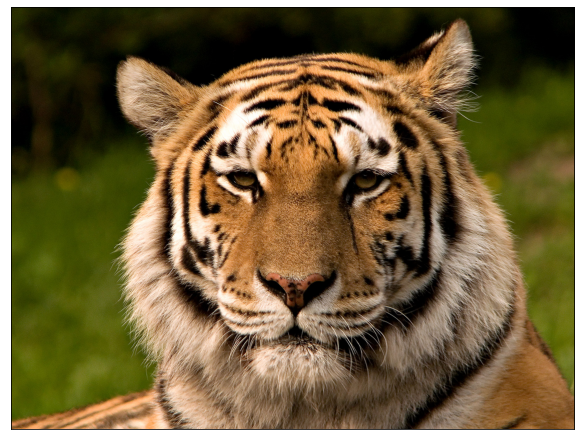

In [6]:
img_org = plt.imread("tiger.jpg")
print(img_org.shape)

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
ax.imshow(img_org)
ax.set_xticks([])
ax.set_yticks([])

fig.savefig("tiger_1.png")

(1200, 1600, 3)


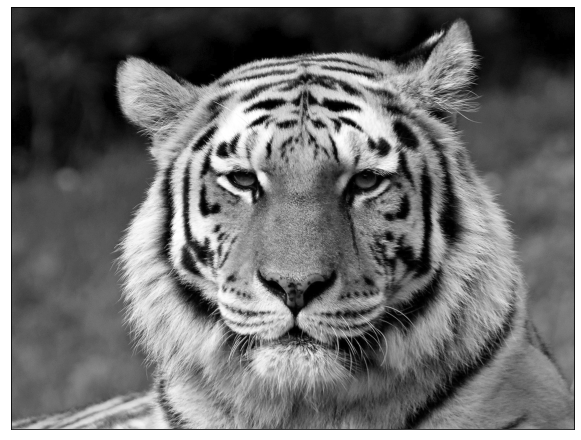

In [11]:
# convert to Lab
from colorspacious import cspace_converter

img_lab = cspace_converter("sRGB1", "CAM02-UCS")(img_org/255)
print(img_lab.shape)
img_L = img_lab[:,:,0]

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
ax.imshow(img_L, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])

fig.savefig("tiger_2.png")

(3, 1920000)


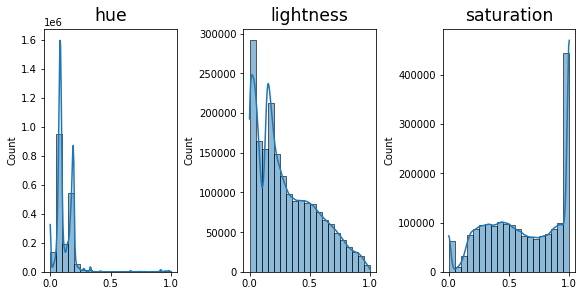

In [35]:
import colorsys

img_hls = np.array([colorsys.rgb_to_hls(*c) for c in (img_org/255).reshape((1600*1200, 3))]).T
print(img_hls.shape)

fig, axs = plt.subplots(ncols=3, figsize=(8, 4), constrained_layout=True)

for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
    sns.histplot(img_hls[i], kde=True, bins=np.linspace(0, 1, 21), ax=ax)
    ax.set_title(title, fontsize="xx-large", pad=8)

fig.savefig("tiger_3.png")

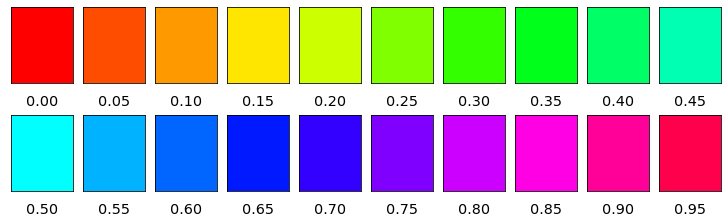

In [24]:
# hue check
hues = np.linspace(0, 1, 21)[:20]
rgbs = list(map(colorsys.hls_to_rgb, *np.array([[h, 0.5, 1] for h in hues]).T))

fig, axes = plt.subplots(ncols=10, nrows=2, figsize=(10, 3), constrained_layout=True)
for ax, rgb, hue in zip(axes.ravel(), rgbs, hues):
    ax.set_facecolor(rgb)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{hue:.2f}", fontsize="x-large", labelpad=12)
    
fig.savefig("tiger_4.png")

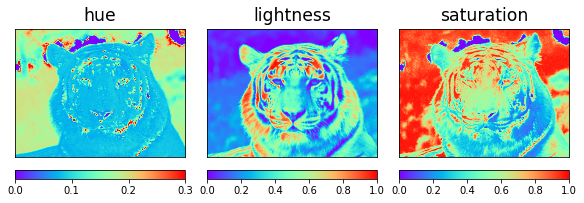

In [32]:
fig, axs = plt.subplots(ncols=3, figsize=(8, 3), constrained_layout=True)

for i, (title, ax) in enumerate(zip(["hue", "lightness", "saturation"], axs)):
    vmax = 0.3 if i == 0 else 1
    im = ax.imshow(img_hls[i].reshape(1200, 1600), cmap="rainbow", vmin=0, vmax=vmax)
    plt.colorbar(im, orientation="horizontal", ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize="xx-large", pad=8)
    
fig.savefig("tiger_5.png")

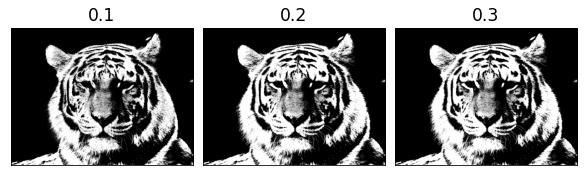

In [64]:
# tiger selection

from copy import deepcopy

img_hls_tiger = deepcopy(img_hls)

fig, axs = plt.subplots(ncols=3, figsize=(8, 3), constrained_layout=True)

h_ths = [0.1, 0.2, 0.3]
for h_th, ax in zip(h_ths, axs):
    chk_tiger = np.where((img_hls[0] < h_th) & (img_hls[1] > 0.4), 1, 0)
    ax.imshow(chk_tiger.reshape(1200, 1600), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{h_th}", fontsize="xx-large", pad=8)

fig.savefig("tiger_6.png")

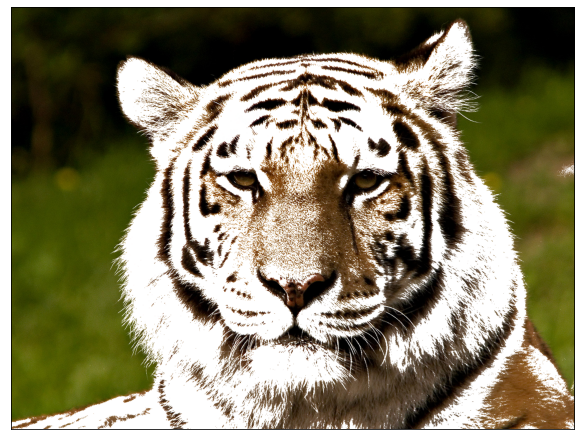

In [70]:
idx_tiger = np.where((img_hls[0] < 0.3) & (img_hls[1] > 0.4))[0]

for idx in idx_tiger:
    img_hls_tiger[1, idx] = min(img_hls_tiger[1, idx]+0.6, 1)
    img_hls_tiger[2, idx] = max(img_hls_tiger[2, idx]-0.6, 0)
    
img_rgb_tiger = np.array([colorsys.hls_to_rgb(*c) for c in img_hls_tiger.T])

fig, ax = plt.subplots(figsize=(8, 6), constrained_layout=True)
ax.imshow(img_rgb_tiger.reshape(1200, 1600, 3))
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("tiger_7.png")